In [27]:
import math
import os

import pickle
import cv2
import matplotlib.pyplot as plt
import numpy as np

In [28]:
from AlrosaDemo.ImageProcessor import ImageProcessor
data = pickle.load(open('../cache/f1b40dd8aba94634b56b744f41fa7dca.pickle', 'rb'))

In [29]:
def filter_only2hands(handness, handflag, keys):
    handness = np.array(handness)
    handness = np.reshape(handness, (len(handness),))

    handflag = np.array(handflag)
    handflag = np.reshape(handflag, (len(handflag),))

    keys = np.array(keys)
    # print(keys.shape, keys)

    if len(handness)<=2:
        return handness, handflag, keys
    indexes = np.argsort(handness)
    handness = np.take(handness, indexes)[-2:]
    handflag = np.take(handflag, indexes)[-2:]
    keys = np.take(keys, indexes, 0)[-2:]
    # keys =
    # print('sssssss')
    # print(keys.shape)
    # 7/0
    return handness, handflag, keys


In [30]:
DATA = []
for frame_index, item in data.items():

    keys = item['keys']
    handness = item['handness']
    handflag = item['handflag']
    handness, handflag, keys = filter_only2hands(handness, handflag, keys)

    for n,f,k in zip(handness, handflag, keys):
        # print(k)
        # print()
        n,f,k = n,f,k #NOTE TODO
        DATA.append(
            (frame_index, n, f, k)
        )
    # break


In [31]:
len(DATA)

253

In [32]:
# DATA

In [33]:
newDATA = []
for frame_index, handness, handflag, keys in DATA:
    if handness<0.5:
        continue
    newDATA.append((
        frame_index, handness, handflag, keys
    ))

In [34]:
len(newDATA)

188

In [35]:
DATA = []
for frame_index, handness, handflag, keys in newDATA:
    xmin,ymin,xmax,ymax = [
            np.min(keys[:,0]),
            np.min(keys[:,1]),
            np.max(keys[:,0]),
            np.max(keys[:,1])]
    square = (xmax-xmin)*(ymax-ymin)
    if square<500:
        continue
    DATA.append((
        frame_index, handness, handflag, keys
    ))

In [36]:
len(DATA)

188

In [37]:
def key_center(k):
    xmin,ymin,xmax,ymax = [
            np.min(k[:,0]),
            np.min(k[:,1]),
            np.max(k[:,0]),
            np.max(k[:,1])]
    return np.array([(xmax+xmin)/2, (ymax+ymin)/2])

def distance(key_center1, key_center2):
    x1, y1 = key_center1
    x2, y2 = key_center2
    return math.sqrt((x2-x1)**2 + (y2-y1)**2)

In [38]:
print(len(DATA))
OBS = []
l=[]
for frame_index, handness, handflag, keys in DATA:
    isAdded = False
    for ob_element in OBS:
        last_one = ob_element[-1]
        delta_flag = abs(last_one[2] - handflag)
        delta_index = abs(last_one[0]-frame_index)
        delta_keys = distance(key_center(keys), key_center(last_one[3]))
        # print('delta', delta_flag, delta_index, delta_keys)
        l.append(delta_keys)
        if delta_keys < 150 \
            and delta_flag < 0.7 \
            and delta_index < 16 and delta_index>0:
            ob_element.append(
                (frame_index, handness, handflag, keys)
            )
            isAdded = True
            break


    if not isAdded:
        OBS.append([(frame_index, handness, handflag, keys)])
    # break

188


In [39]:
obs2=[]
for i in OBS:
    obs2.append(
        [len(i), i]
    )
    print(len(i))

11
69
20
1
2
22
1
2
17
1
4
31
2
3
1
1


In [40]:
obs2 = sorted(obs2, key= lambda x: -x[0])

In [169]:
files = [f for f in os.listdir('../dataset/frames/{}'.format('f1b40dd8aba94634b56b744f41fa7dca'))]
files = sorted(files, key=lambda x: int(x[:-4]))
frames = [plt.imread('../dataset/frames/{}/{}'.format('f1b40dd8aba94634b56b744f41fa7dca',i))for i in files]

In [42]:
len(frames)

285

In [43]:
imageProcessor = ImageProcessor()

In [44]:
colors = [(0, 0, 0),
(128, 128, 128),
(192, 192, 192),
(255, 255, 255),
(255, 0, 255),
(128, 0, 128),
(255, 0, 0),
(128, 0, 0),
(255, 255, 0),
(128, 128, 0),
(0, 255, 0),
(0, 128, 0),
(0, 255, 255),
(0, 128, 128),
(0, 0, 255),
(0, 0, 128),]

In [45]:
counter = 0
for i, elem in obs2:
    c = colors[counter%len(colors)]
    # print(c)
    # print(i)
    for frame_index,n,f,k in elem:
        frames[frame_index] = imageProcessor.vis_hand(frames[frame_index], k, c)
        # imageProcessor.v
    counter+=1
    # break

In [46]:
frames[0].shape[0], frames[0].shape[1]

(1080, 1920)

In [172]:
path_to_video = 't.mp4'
out = cv2.VideoWriter(path_to_video,
                      cv2.VideoWriter_fourcc(*'mp4v'),
                      15,
                      (frames[0].shape[1], frames[0].shape[0]))
cv2.VideoWriter()
for ind in range(len(frames)):
    out.write(frames[ind])
out.release()

In [48]:

len(obs2)

16

In [148]:
for ob in obs2:
    # print(ob)
    x, y = [], []
    for i in ob[1]:
        print(i[3])
        x.append(i[0])
        y.append(i[3])
        # 7/0
    # plt.plot(x,y); plt.show()
    break
y = np.array(y)
y.shape

[[171.14907554 614.46724834]
 [165.68212128 574.87753377]
 [139.12822723 547.21866698]
 [111.89001852 527.14130489]
 [ 92.22107872 511.76557384]
 [112.1505241  561.55695755]
 [ 61.25409277 548.65334994]
 [ 44.5486524  546.04275238]
 [ 36.24660534 546.37093691]
 [102.33146036 584.44763513]
 [ 48.33622777 570.76260804]
 [ 40.86146464 566.53182215]
 [ 43.19905271 566.30894425]
 [ 98.322525   606.96314692]
 [ 51.49240952 591.9958736 ]
 [ 52.09842644 587.09807972]
 [ 61.13709444 587.12132729]
 [ 98.78106991 627.54572113]
 [ 62.93209885 614.49797273]
 [ 58.83218441 607.22741679]
 [ 62.50591615 605.48442365]]
[[168.08034938 613.32271334]
 [161.23493317 575.78076242]
 [133.93448091 548.36261106]
 [107.60522214 527.15081727]
 [ 88.51820793 510.15460676]
 [108.4775373  563.98242562]
 [ 58.20494465 549.07023303]
 [ 43.16162633 546.1599196 ]
 [ 37.4615574  547.12558809]
 [ 99.75624906 585.75835093]
 [ 46.35426196 571.45487877]
 [ 41.07544278 568.76350754]
 [ 45.97936358 569.6974214 ]
 [ 96.9492144

(69, 21, 2)

In [170]:
def my_interpolate(x,y):
    f = interpolate.interp1d(x, y, )
    x1 = np.arange(x[0], x[-1]+1)
    y1 = f(x1)
    window_size, poly_order = 9, 1
    yy_sg = savgol_filter(y1, window_size, poly_order)
    return x1,yy_sg

xses, yses = [] , []
for i in range(0,21):
    xs,ys = y[:,i,0],y[:,i,1]
    newx, newxs = my_interpolate(x,xs)
    newx, newys = my_interpolate(x,ys)
    # plt.plot(x,ys)
    # plt.plot(newx, newys)
    # plt.show()
    xses.append(newxs)
    yses.append(newys)
xses = np.array(xses)
yses = np.array(yses)

xses.shape, yses.shape
arr = np.stack([xses, yses], 2)
arr.shape

(21, 137, 2)

In [171]:
arr.shape
for index, i in enumerate(range(arr.shape[1])):
    # print(arr[:,i,:].shape)
    key = arr[:,i,:]
    # frame = frames[newx[index]]
    frames[newx[index]] = imageProcessor.vis_hand(frames[newx[index]], key)

In [164]:
newx

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
       104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
       117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
       130, 131, 132, 133, 134, 135, 136])

In [52]:
o = obs2[0][1]


In [53]:
o

[(0,
  0.9999999,
  0.006422717,
  array([[171.14907554, 614.46724834],
         [165.68212128, 574.87753377],
         [139.12822723, 547.21866698],
         [111.89001852, 527.14130489],
         [ 92.22107872, 511.76557384],
         [112.1505241 , 561.55695755],
         [ 61.25409277, 548.65334994],
         [ 44.5486524 , 546.04275238],
         [ 36.24660534, 546.37093691],
         [102.33146036, 584.44763513],
         [ 48.33622777, 570.76260804],
         [ 40.86146464, 566.53182215],
         [ 43.19905271, 566.30894425],
         [ 98.322525  , 606.96314692],
         [ 51.49240952, 591.9958736 ],
         [ 52.09842644, 587.09807972],
         [ 61.13709444, 587.12132729],
         [ 98.78106991, 627.54572113],
         [ 62.93209885, 614.49797273],
         [ 58.83218441, 607.22741679],
         [ 62.50591615, 605.48442365]])),
 (2,
  0.99999964,
  0.1685782,
  array([[168.08034938, 613.32271334],
         [161.23493317, 575.78076242],
         [133.93448091, 548.3626110

In [72]:
x,y = [],[]
for i in o:
    x.append(i[0])
    y.append(i[3][0][0])

In [73]:
y

[171.14907553620208,
 168.08034938443072,
 169.76930476041042,
 172.97683042403995,
 169.07963820266943,
 168.78533368198418,
 166.91382498488625,
 166.87171140623116,
 168.58144907835944,
 167.61227139676896,
 169.54250846110014,
 167.18494820882415,
 168.62970748884365,
 166.97203632834646,
 173.22471648709205,
 168.66315509923535,
 169.53170347524545,
 169.95842030585496,
 167.03928015144837,
 169.43166513956444,
 167.6149707546881,
 169.4224828901317,
 168.69027687680838,
 166.9284342232175,
 170.36785468060233,
 171.64097924879206,
 169.35359765453404,
 170.7022673868726,
 171.86981053302182,
 167.84020175906102,
 167.42133415089606,
 170.13193021044793,
 166.97401871706023,
 167.93011273841026,
 166.99948405840922,
 164.91778352485974,
 164.87267713542826,
 165.30777802372202,
 168.23100999927786,
 168.08991965949167,
 168.2964804030972,
 169.9421893005081,
 168.54005445803497,
 171.36015996395489,
 171.62481372368813,
 168.09820545713822,
 169.70941967652436,
 173.2089980248336,

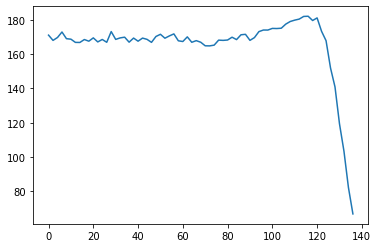

In [75]:
plt.plot(x,y)

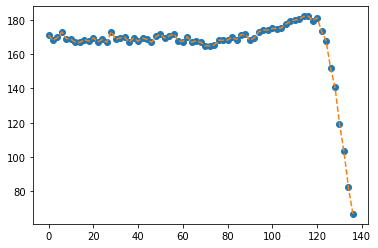

In [109]:
from scipy import interpolate
f = interpolate.interp1d(x, y, )
x1 = np.arange(x[0], x[-1]+1)
y1 = f(x1)
plt.plot(x, y, 'o', x1, y1, '--')

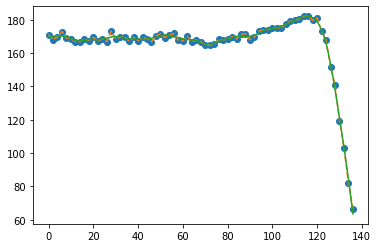

In [122]:
import scipy
from scipy.signal import savgol_filter


window_size, poly_order = 15, 2
yy_sg = savgol_filter(y1, window_size, poly_order)
plt.plot(x, y, 'o', x1, y1, '--', x1, yy_sg, '-')
# plt.plot(x1, yy_sg)

In [107]:
import scipy.fftpack


def furry(x,y):
    w = scipy.fftpack.rfft(y)
    f = scipy.fftpack.rfftfreq(len(x), x[1]-x[0])
    spectrum = w**2
    print(spectrum.max(), spectrum.max()/5)
    print('spect' , spectrum)
    cutoff_idx = spectrum < (spectrum.max()/1000)
    w2 = w.copy()
    # print(w2)
    w2[cutoff_idx] = 0

    y2 = scipy.fftpack.irfft(w2)
    return y2

yf = furry(x1,y1)

516936449.37724143 103387289.87544829
spect [5.16936449e+08 2.77421691e+05 8.90194882e+03 5.62857917e+05
 1.26384431e+04 3.09795069e+05 1.75839292e+05 1.77588434e+05
 2.25656147e+05 3.75353703e+04 2.66209012e+05 1.97623311e+04
 2.25703376e+05 2.41044440e+03 1.63904131e+05 1.01043626e+02
 1.01884150e+05 7.02545427e+00 9.63847680e+04 8.48682088e+02
 6.29950647e+04 2.79023179e+02 5.11924856e+04 4.22164009e+01
 3.17145940e+04 1.13364991e+03 3.41099794e+04 2.26127807e+03
 2.17804336e+04 8.88978340e+02 2.55724874e+04 2.40276333e+03
 2.21931622e+04 2.38009983e+03 1.64162622e+04 1.53417373e+03
 1.64133563e+04 3.82454703e+03 9.87089641e+03 4.69647408e+03
 1.13386535e+04 4.75951905e+02 1.25578844e+04 4.44744047e+03
 1.02777195e+04 2.05664749e+03 9.08012886e+03 3.02493402e+03
 6.13722311e+03 6.21184070e+03 8.95648222e+03 1.96056945e+03
 7.67399039e+03 2.66616493e+03 7.17328862e+03 3.08688749e+03
 4.45232531e+03 4.96099866e+03 8.53310650e+03 3.48686014e+03
 7.90541599e+03 3.05513610e+03 5.04359609

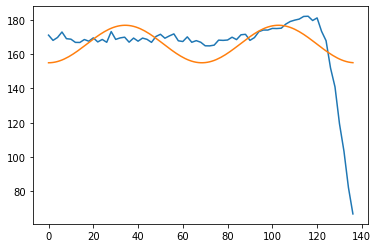

In [108]:
plt.plot(x,y)
plt.plot(x1,yf)

In [80]:

yf

array([165.95793053, 165.95793053, 165.95793053, 165.95793053,
       165.95793053, 165.95793053, 165.95793053, 165.95793053,
       165.95793053, 165.95793053, 165.95793053, 165.95793053,
       165.95793053, 165.95793053, 165.95793053, 165.95793053,
       165.95793053, 165.95793053, 165.95793053, 165.95793053,
       165.95793053, 165.95793053, 165.95793053, 165.95793053,
       165.95793053, 165.95793053, 165.95793053, 165.95793053,
       165.95793053, 165.95793053, 165.95793053, 165.95793053,
       165.95793053, 165.95793053, 165.95793053, 165.95793053,
       165.95793053, 165.95793053, 165.95793053, 165.95793053,
       165.95793053, 165.95793053, 165.95793053, 165.95793053,
       165.95793053, 165.95793053, 165.95793053, 165.95793053,
       165.95793053, 165.95793053, 165.95793053, 165.95793053,
       165.95793053, 165.95793053, 165.95793053, 165.95793053,
       165.95793053, 165.95793053, 165.95793053, 165.95793053,
       165.95793053, 165.95793053, 165.95793053, 165.95